# 분류알고리즘

In [16]:
# 필요한 라이브러리 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# seaborn lib add
import seaborn as sns

from glob import glob

%matplotlib inline

import json

import warnings
warnings.filterwarnings(action = 'ignore') 

from datetime import date, datetime, timedelta
from dateutil.parser import parse

print("numpy version:",np.__version__) 
print("pandas version:",pd.__version__)

# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

import numpy as np
import pandas as pd
import sklearn
from sklearn.datasets import load_iris, load_breast_cancer, load_digits

from IPython.display import Image

from sklearn.model_selection import train_test_split, KFold , StratifiedKFold, cross_val_score , cross_validate,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, make_scorer, precision_recall_curve, roc_curve,roc_auc_score 
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator
from sklearn.preprocessing import LabelEncoder ,OneHotEncoder,StandardScaler, MinMaxScaler, Binarizer
import graphviz

import missingno as msno

sklearn.__version__

numpy version: 1.20.1
pandas version: 1.2.4


'0.24.1'

## 분류의 머신러닝 알고리즘 종류
- 나이브 베이즈
- 로지스틱회귀(Logistic Regression) : 
- 결정트리(Decision Tree)
- 서포트 벡터 머신(Support Vector Machine)
- 최소 근접 알고리즘(Nearest Neighbor)
- 심층 연결 기반의 신경망(Neural Network)
- 서로 다른(또는 같은) 머신러닝 알고리즘을 결합한 앙상블(Ensemble)
- 대표적인 배깅은 랜덤포레스트이다.

## Voting 연습

In [6]:
mnist = load_digits()
print('type:', type(mnist))
print('keys:', mnist.keys())
features, labels = mnist.data, mnist.target

type: <class 'sklearn.utils.Bunch'>
keys: dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [12]:
print("features: \n",features)
print("labels: \n",labels)

features: 
 [[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
labels: 
 [0 1 2 ... 8 9 8]


In [13]:
features.shape, labels.shape

((1797, 64), (1797,))

In [14]:
labels

array([0, 1, 2, ..., 8, 9, 8])

In [19]:
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    labels,
                                                    test_size=0.2,
                                                    random_state = 100)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1437, 64), (360, 64), (1437,), (360,))

In [38]:
tree_model = DecisionTreeClassifier(criterion = 'entropy',
                                   max_depth = 8,
                                   max_features = 32,
                                   random_state = 35)

knn_model = KNeighborsClassifier(n_neighbors = 299)
svm_model = SVC(probability = True)

In [25]:
def metrics_evaluation(target, prediction):
    print('accuracy : ',accuracy_score(target, prediction))
    

In [32]:
tree_model.fit(X_train,y_train)
tree_pred = tree_model.predict(X_test)

knn_model.fit(X_train,y_train)
knn_pred = knn_model.predict(X_test)

svm_model.fit(X_train,y_train)
svm_pred = svm_model.predict(X_test)

In [33]:
metrics_evaluation(y_test, tree_pred)
metrics_evaluation(y_test, knn_pred)
metrics_evaluation(y_test, svm_pred)

accuracy :  0.8694444444444445
accuracy :  0.8555555555555555
accuracy :  0.9916666666666667


In [44]:
hard_voting_model = VotingClassifier(estimators = [('tree',tree_model), ('knn', knn_model), ('svn',svm_model)],
                               weights = [1,1,1],
                               voting = 'hard')
hard_voting_model.fit(X_train, y_train)
hard_voting_pred = voting_model.predict(X_test)
metrics_evaluation(y_test, hard_voting_pred)

accuracy :  0.9361111111111111


In [45]:
soft_voting_model = VotingClassifier(estimators = [('tree',tree_model), ('knn', knn_model), ('svn',svm_model)],
                               weights = [1,1,1],
                               voting = 'soft')
soft_voting_model.fit(X_train, y_train)
soft_voting_pred = voting_model.predict(X_test)
metrics_evaluation(y_test, soft_voting_pred)

accuracy :  0.9361111111111111


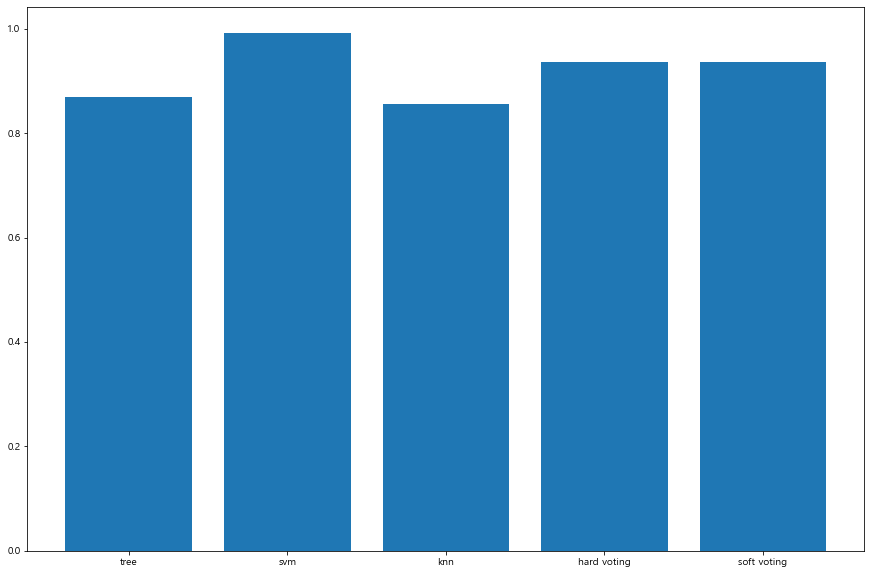

In [49]:
plt.figure(figsize = (15,10))
x=np.arange(5)

plt.bar(x,height =[
    accuracy_score(y_test, tree_pred),
    accuracy_score(y_test, svm_pred),
    accuracy_score(y_test, knn_pred),
    accuracy_score(y_test, hard_voting_pred),
    accuracy_score(y_test, soft_voting_pred)
])

plt.xticks(x, ['tree', 'svm', 'knn','hard voting','soft voting'])
plt.show()
plt.close()